# Linear Regression
- Attempts to establish how X causes Y

### Correlation vs Linear Regression
**Similarities**
- Quantify the direction and strength of the relationship

**Differences**
- Correlation is a single statistic
- Linear regression produces an equation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

<IPython.core.display.Javascript object>


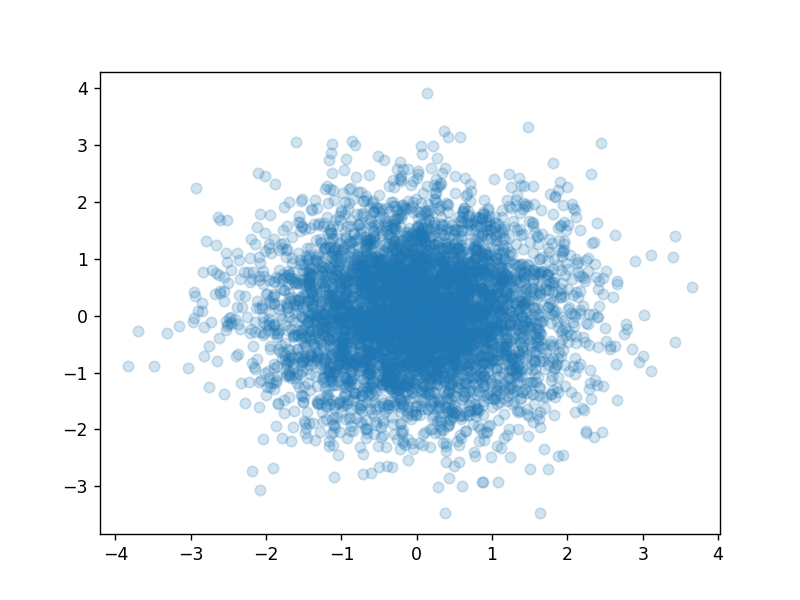

In [3]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)

In [4]:
tickers = ['AAPL', 'TSLA', 'IBM', 'MSFT', '^GSPC']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  5 of 5 completed


In [5]:
data = data['Adj Close']

In [6]:
data.head()

,AAPL,IBM,MSFT,TSLA,^GSPC
Date,,,,,
2020-01-02,73.449387,110.232513,155.761810,28.684000,3257.850098
2020-01-03,72.735306,109.353378,153.822250,29.534000,3234.850098
2020-01-06,73.314880,109.158020,154.219910,30.102667,3246.280029
2020-01-07,72.970093,109.231270,152.813766,31.270666,3237.179932
2020-01-08,74.143890,110.142967,155.247818,32.809334,3253.050049


In [7]:
log_returns = np.log(data/data.shift())

In [8]:
log_returns

,AAPL,IBM,MSFT,TSLA,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,0.029203,-0.007085
2020-01-06,0.007937,-0.001788,0.002582,0.019072,0.003527
2020-01-07,-0.004714,0.000671,-0.009160,0.038067,-0.002807
2020-01-08,0.015958,0.008312,0.015803,0.048033,0.004890
...,...,...,...,...,...
2023-03-27,-0.012369,0.031582,-0.015047,0.007326,0.001646
2023-03-28,-0.003988,0.000232,-0.004170,-0.013753,-0.001575
2023-03-29,0.019597,0.002857,0.019002,0.024488,0.014137


In [9]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


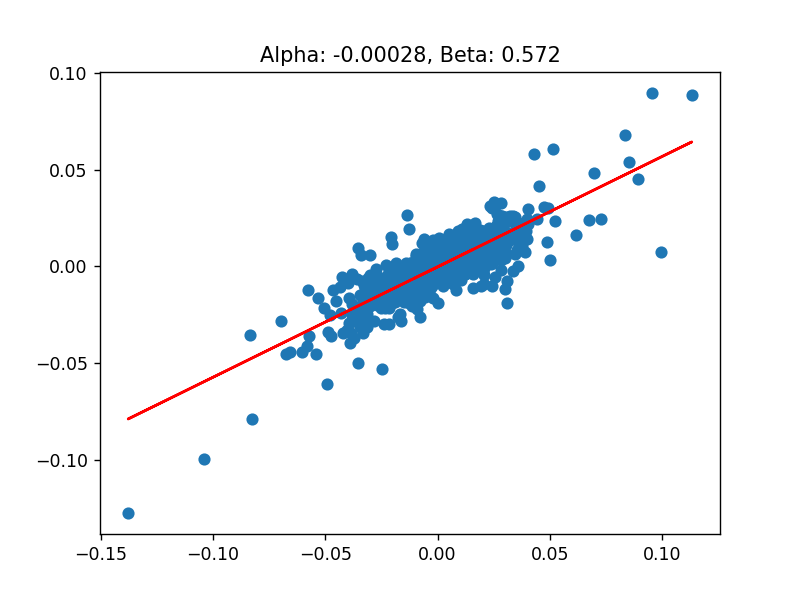

In [10]:
linear_regression("AAPL", "^GSPC")

<IPython.core.display.Javascript object>


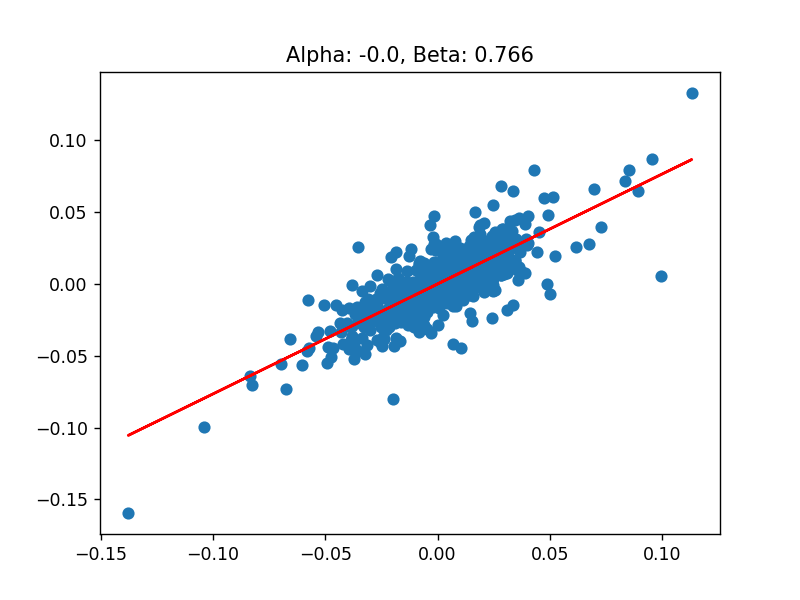

In [11]:
linear_regression("AAPL", "MSFT")

<IPython.core.display.Javascript object>


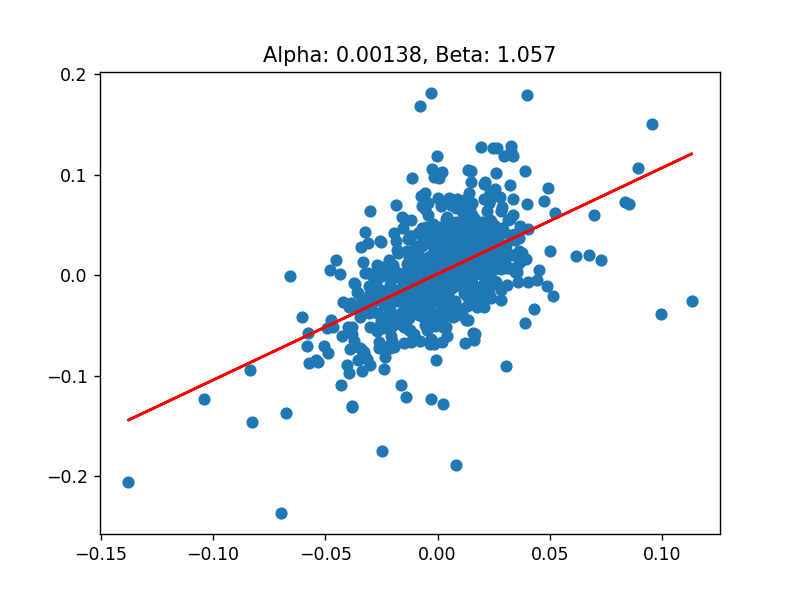

In [12]:
linear_regression("AAPL", "TSLA")